# Lecture 2: Stochastic Gradient Descent and Backpropagation

In this notebook, you'll find various tasks encompassing both theoretical and coding exercises. Each exercise corresponds to a specific number of points, which are explicitly indicated within the task description.

Always use the Jupyter kernel associated with the dedicated environment when compiling the notebook and completing your exercises.

Benedikt Auer, Paul Ludwig, Jannik Niebling 

## Excercise 1 (Theory) (15/100)

### Understanding SGD

- Explain the concept of stochastic gradient descent. **(5 pts.)**
- What is the key difference between stochastic gradient descent and regular gradient descent? **(5 pts.)**
- Discuss the advantages and disadvantages of using stochastic gradient descent. **(5 pts.)**

### Your solution here

> You can write your answer in Markdown in the markdown cell below or do this in a separate document.


a) Stochastic gradient descent is a version of gradient descent where the full sum/average which would ordinarily be taken in the lossfunction is approximated by the average over a sample of the data. Aside from that it is a "normal" gradient descent algorithm which moves all parameters a certain stepsize againt their gradient in the lossfuntion to find the minimum of the loss function.

b) Not all of the data is evaluated for each gradient descent step but rather only a sample which typically contains only a small fraction of the data

c) disadvantage: the approximation of the whole by the sample is not perfect an introduces some noise. This however can also be an advantage if one is for example stuck in a shallow local minimum.

   advantage: since the sample is much smaller than the full data, SGD is much faster to compute

## Excercise 2 (Theory) (15/100)
### SGD Algorithm

Consider the following pseudo-code for stochastic gradient descent:
```plaintext
Initialize parameters θ
Set learning rate α
For each iteration t = 1, 2, ..., T:
    Randomly shuffle the training data
    For each training example (x_i, y_i):
        Compute the gradient: ∇_θ L(θ; x_i, y_i)
        Update parameters: θ = θ - α * ∇_θ L(θ; x_i, y_i)
```

- Explain the steps involved in the stochastic gradient descent algorithm. **(5 pts.)**
- Discuss the importance of randomly shuffling the training data at each iteration. **(5 pts.)**
- How does the choice of learning rate affect the convergence of stochastic gradient descent? **(5 pts.)**


### Your solution here

> You can write your answer in Markdown in the markdown cell below or do this in a separate document.


a) For each iteration of SGD we pick a random sample from the data. Then we compute the gradient of this sample and update the parameters according to the gradient descent perscription with a stepsize alpha. This is repeated T times. (we also have to initialize some stuff in the biginning but that is not really a part of the actual gradient descent)

b) Randomly drawing the sample each time makes sure that SGD is a constistent estimator (here the constistent is to be undestood such that the population is not the size of the samples but the number of samples drawn in total). If the samples is the same every time the estimator is still unbiased, but not constistent due to the fact that the sample could (and most likely would be) not representative is some way.

c) A higher learning rate generally leads to a faster convergence initially can prohibit actually reaching the true minimum. Similarly a low leaning rate leads to a slow convergence that is more prone to fining small local minima, but is able to more acuratly dip into those minima. Additionally for SDG the variance of the gradient estimator and thus the noise is proportional to the learning rate.

## Excercise 3 (Theory) (25/100)
### Backpropagation

Consider a simple neural network with a single input neuron, a single hidden neuron, and a single output neuron. The network uses sigmoid activation functions in both the hidden and output layers. 

The following parameters are given

- Input value: $x = 0.5$
- Output value: $y = 0.7$
- Initial weights: 
  - $w_{\text{hidden}} = 0.8$
  - $w_{\text{output}} = -0.4$
- Initial biases: 
  - $b_{\text{hidden}} = 0.2 $
  - $b_{\text{output}} = -0.6 $

Perform one iteration of the backpropagation algorithm to update the weights and biases using the following steps:

1. Forward pass: Compute the output of the neural network. **(5 pts.)**
2. Compute the loss: Use the **mean squared error** loss function. **(5 pts.)**
3. Backward pass: Compute the gradients of the loss with respect to the weights and biases. **(5 pts.)**
4. Update the weights and biases using a learning rate of **$\eta=0.1$**. **(5 pts.)**
5. What are the numerical values of the updated weights? **(5 pts.)**

### Your solution here

> You can write your answer in Markdown in the markdown cell below or do this in a separate document.


In [4]:
import numpy as np 
def sig(x):
    return 1/(1 + np.exp(-x))

def d_sig(x):
    return sig(x)*(1-sig(x))

1. Output:

In [2]:
sig(sig(0.5*0.8+0.2)*(-0.4)-0.6)

0.2977024822774294

2. Loss:

In [3]:
(sig(sig(0.5*0.8+0.2)*(-0.4)-0.6)-0.7)**2

0.16184329276574197

3. gradient

In [8]:
d_w_hidden = d_sig(sig(0.5*0.8+0.2)*(-0.4)-0.6)*0.8*d_sig(0.5*0.8+0.2)*0.5

d_b_hidden = d_sig(sig(0.5*0.8+0.2)*(-0.4)-0.6)*0.8*d_sig(0.5*0.8+0.2)

d_w_output = d_sig(sig(0.5*0.8+0.2)*(-0.4)-0.6)*sig(0.5*0.8+0.2)

d_b_output = d_sig(sig(0.5*0.8+0.2)*(-0.4)-0.6)

print(d_w_hidden)
print(d_b_hidden)
print(d_w_output)
print(d_b_output)

0.019133291399754445
0.03826658279950889
0.13499105343149262
0.20907571432328623


4. update:

In [9]:
w_hidden = 0.8-0.1*d_w_hidden

b_hidden = 0.2-0.1*d_b_hidden

w_output = -0.4-0.1*d_w_output

b_output = -0.6-0.1*d_b_output

5. values:

In [11]:
print(w_hidden)
print(b_hidden)
print(w_output)
print(b_output)

0.7980866708600246
0.19617334172004913
-0.41349910534314926
-0.6209075714323286


## Excercise 1 (Programming) (45/100)


**Task (1.a)** **(10 pts.)**
Design a dataset where each input $x$ consists of a collection of tensors, each of shape (2), generated randomly. The corresponding output $y$ is the result of a scalar function $y=\sin^2(x)+\cos(x)$. Implement a PyTorch Dataset class that can generate samples of the designed dataset. Ensure that it properly handles data loading, shuffling, and batching
 

> #### NB. You can decide if you want to generate X and Y upfront and pass them in the `CustomDataset` class or if instead you want to define a method of the `class` which handles the data generation inside the class (see below for an example). Note that there are in principle many way of doing this. Feel free to experiment. 

In [1]:
import torch
from torch.utils.data import Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, X):
        self.X = X.reshape(-1,1)
        self.Y = (torch.sin(X)**2+torch.cos(X)).reshape(-1,1)
        self.shape = len(X)
        pass

    def __getitem__(self, index):
        return self.X[index],self.Y[index]
        # ----------------
        # Your code here
        # ----------------
        pass
           
    def __len__(self):
        return self.shape
        # ----------------
        # Your code here
        # ----------------
        pass
            
    def true_fn(self):
        return self.Y
        # ----------------
        # Your code here
        # ----------------
        pass

**Task (1.b)** **(10 pts.)** 
Design a neural network architecture using PyTorch that can effectively learn the mapping between the input data $x$ and the output data $y$.

In [2]:
import torch.nn as nn

# TODO: specify input and output dimensions 
# the number of inputs is 1, since the output calue is also scalar it is also 1
input_dim=1
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim,hidden_layers_list,  bias=False, activation=nn.ReLU):
        super().__init__()
        self.layers = nn.ModuleList()
        input_dim = input_dim
        for hidden_dim in hidden_layers_list:
            self.layers.append(nn.Linear(input_dim, hidden_dim,bias))
            self.layers.append(activation())
            input_dim = hidden_dim
        self.output_layer = nn.Linear(input_dim, output_dim,bias)
        pass

    def forward(self, x):
        out = x
        for layer in self.layers:
            out = layer(out)
        return self.output_layer(out)
    
model = NeuralNetwork(input_dim, output_dim, [64,64,64])
print(model)

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=1, out_features=64, bias=False)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=False)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=False)
    (5): ReLU()
  )
  (output_layer): Linear(in_features=64, out_features=1, bias=False)
)


**Task (1.c)** **(15 pts.)** 
Train the designed neural network using the dataset generated in part **1.a**. Utilize appropriate loss function and optimization algorithm. Train the network for a sufficient number of epochs to achieve convergence. Try out different activation functions, layer sizes, and network depth. Comment on the most optimal choice obtained. Which optimizer have you used and why?

In [23]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Parameters
num_epochs = 100
batch_size = 32
learning_rate = 0.001
lossHist = np.zeros(num_epochs)
X = torch.rand(100000)

# Initialize dataset and dataloader
dataset = CustomDataset(X)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = NeuralNetwork(1, 1, [32,16,8,4],bias=False,activation=nn.Sigmoid)

# TODO: choose loss and optimizer based on what you have learned in the lecture
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(num_epochs):
  for inputs, targets in dataloader:
      #forward 
        outputs = model(inputs)
        loss = criterion(outputs,targets)

        #backwards
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
  lossHist[epoch] = loss.item()
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')


Epoch [1/100], Loss: 0.00804928
Epoch [2/100], Loss: 0.00000100
Epoch [3/100], Loss: 0.00000131
Epoch [4/100], Loss: 0.00000176
Epoch [5/100], Loss: 0.00000114
Epoch [6/100], Loss: 0.00000247
Epoch [7/100], Loss: 0.00000150
Epoch [8/100], Loss: 0.00000152
Epoch [9/100], Loss: 0.00000194
Epoch [10/100], Loss: 0.00000129
Epoch [11/100], Loss: 0.00000109
Epoch [12/100], Loss: 0.00000093
Epoch [13/100], Loss: 0.00000063
Epoch [14/100], Loss: 0.00000053
Epoch [15/100], Loss: 0.00000061
Epoch [16/100], Loss: 0.00000155
Epoch [17/100], Loss: 0.00000073
Epoch [18/100], Loss: 0.00000049
Epoch [19/100], Loss: 0.00000123
Epoch [20/100], Loss: 0.00000013
Epoch [21/100], Loss: 0.00000009
Epoch [22/100], Loss: 0.00000050
Epoch [23/100], Loss: 0.00000009
Epoch [24/100], Loss: 0.00000029
Epoch [25/100], Loss: 0.00000026
Epoch [26/100], Loss: 0.00000022
Epoch [27/100], Loss: 0.00000014
Epoch [28/100], Loss: 0.00000017
Epoch [29/100], Loss: 0.00000008
Epoch [30/100], Loss: 0.00000010
Epoch [31/100], Los

The most optimal choice was the use of 8 hidden  layers ( 4 combitation of linear and activation function ) with a pyramid decreasing number of layers. For a ReLU activation function the loss rate varied around 0.2 to 0.3 with out decreassing at higher epos, indicating "dying ReLU", with a Lossy ReLU things improved. The sigmoind function provided the best learing. As optimizer the Adam optimizer, a stochastically optimizer based  on  low order momentum estimation  was used. It is a good general purpose optimizer. 

**Task (1.a)** **(10 pts.)** 
Plot the neural network training loss and show final results on a new set of test points:
Visualize the training loss over epochs to observe the training progress. Additionally, generate a new set of test points, pass them through the trained neural network, and display the results. Evaluate the performance of the neural network on this test set to assess its generalization ability

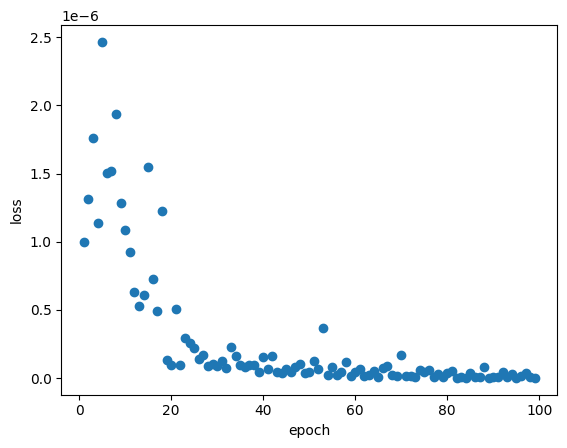

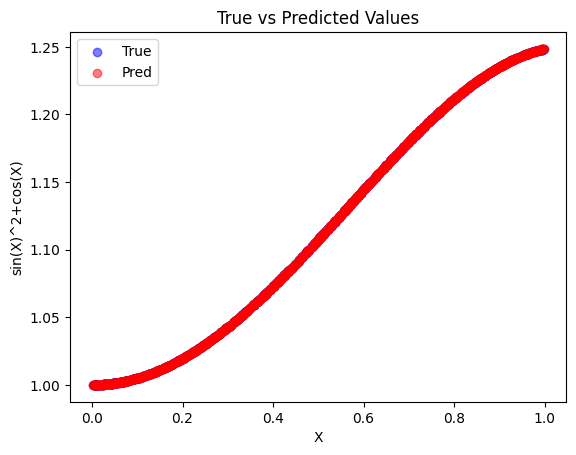

Mean loss: 2.2665482646289092e-09


In [25]:
import matplotlib.pyplot as plt

# Part 1: Plot training loss

plt.scatter(range(num_epochs)[1:], lossHist[1:]) #dont show the first one , for scaling reasons
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
# Part 2: Test the trained model on a new set of points
size=1000
X_test = np.zeros(size)
y_test = np.zeros(size)
y_pred = np.zeros(size)
test_loss = np.zeros(size)
testSet=  CustomDataset(torch.rand(size))
testLoader = DataLoader(testSet,shuffle=False)
model.eval()
with torch.no_grad():
    for i, (inputs,targets) in enumerate(testLoader):
        X_test[i] = inputs[0]
        y_test[i] = targets[0]
        y_pred[i] = model(inputs)[0]
        test_loss[i] = criterion(model(inputs),targets).item()
# Test the model

# ----------------
# Your code here
# ----------------

# Plot results
plt.scatter(X_test, y_test, label='True', color='blue', alpha=0.5)
plt.scatter(X_test, y_pred, label='Pred', color='red', alpha=0.5)

plt.xlabel('X')
plt.ylabel('sin(X)^2+cos(X)')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()
print(f"Mean loss: {np.mean(test_loss)}")